In [2]:
import numpy as np
import matplotlib.pyplot as plt

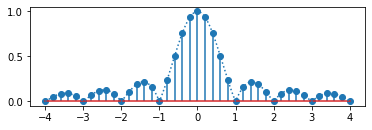

In [15]:
# Spectrum of pulse (连载128)
plt.subplot(211)
f = np.arange(-4,4.2,0.2)
X = abs(np.sinc(f))
plt.stem(f,X,use_line_collection=True)
f = np.arange(-4,4.01,0.01)
X = abs(np.sinc(f))
plt.plot(f,X,':')


plt.show()

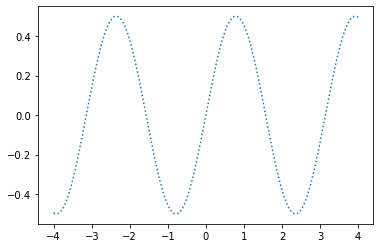

In [16]:
f = np.arange(-4,4.01,0.01)
X = np.sin(f)*np.cos(f)
plt.plot(f,X,':')

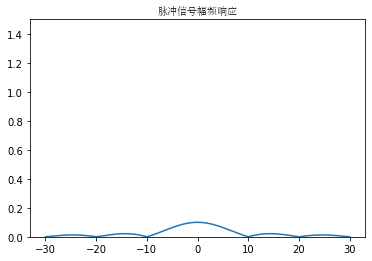

In [24]:
# np.convolve
# 脉冲程序滤波器的频率响应Ts*|sinc(Ts*f)|
f=np.arange(-30,30.1,0.1)
Ts=0.1
y=abs(Ts*np.sinc(Ts*f))
plt.plot(f,y)
plt.title("脉冲信号幅频响应",fontproperties='stsong')
plt.ylim(0,1.5)
plt.show()

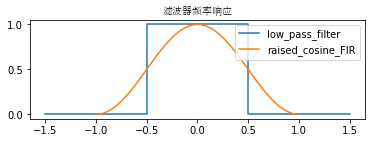

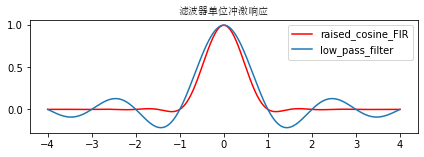

In [43]:
# 连载221，222 升余弦滚降滤波器与理想低通滤波器频域频率响应与时域单位冲激响应对比
plt.subplot(2,1,1)
f=np.arange(-1.0,1.01,0.01)
x = [-1.5,-0.5,-0.5,0.5,1.5]
y = [0,0,1,1,0]
plt.plot(x,y,drawstyle='steps-pre',label='low_pass_filter')
y2 = 0.5*(1+np.cos(np.pi*f))
plt.plot(f,y2,label='raised_cosine_FIR')
plt.title('滤波器频率响应',fontproperties='stsong')
plt.legend()
plt.show()

# 单位冲激响应,B=0.5
plt.subplot(2,1,2)
t = np.arange(-4,4.01,0.01)
y1 = np.sinc(t)*np.cos(np.pi*t)/(1-4*t*t)
plt.plot(t,y1,color='r',label='raised_cosine_FIR')
y2 = np.sinc(t)
plt.plot(t,y2,label='low_pass_filter')
plt.title('滤波器单位冲激响应',fontproperties='stsong')
plt.legend()
plt.plot()
plt.tight_layout()

In [44]:
1/1024

0.0009765625

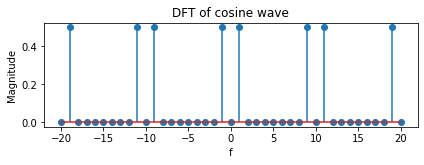

In [18]:
# cosine wave(cos2pit) 进行 DFT
# plt.subplot(2,1,1)
t = np.arange(0,1.01,0.01)
f = np.cos(2*np.pi*t)
# plt.plot(t,f)
plt.xlabel('t')
plt.ylabel('magnitude')
plt.title('cosine wave')
N = 10
n = np.arange(0,N,1)
f = np.cos(2*np.pi*n/N)
t = np.arange(0,1,0.1)
# plt.stem(t,f,use_line_collection=True)

# N=10, Ts=0.1s
plt.subplot(2,1,2)
n = np.arange(0,N,1)
x = np.cos(2*np.pi*n/N)
c = []
for k in np.arange(-N*2,N*2+1,1):
    S=0
    for n2 in n:
        S = S+x[n2]*np.exp(-1j*2*np.pi*k*n2/N)
    c.append(S/N)    
k = np.arange(-N*2,N*2+1,1)
plt.stem(k,c,use_line_collection=True)
plt.xlabel('f')
plt.ylabel('Magnitude')
plt.title('DFT of cosine wave')
plt.tight_layout()

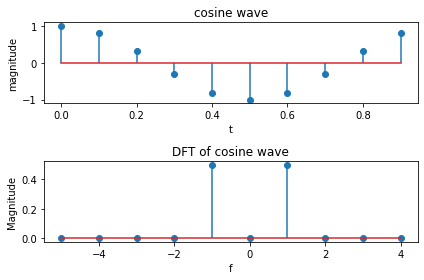

In [15]:
# 时域采样信号
plt.subplot(211)
N = 10
n = np.arange(0,N,1)
f = np.cos(2*np.pi*n/N)
t = np.arange(0,1,0.1)
plt.stem(t,f,use_line_collection=True)
plt.xlabel('t')
plt.ylabel('magnitude')
plt.title('cosine wave')
# 频谱信号
# REF: http://localhost:8888/notebooks/PycharmProjects/Untitled2.ipynb
plt.subplot(212)
S = np.fft.fft(f)/N
# 给出横坐标的数字频率, 第一个参数n是FFT的点数，一般取FFT之后的数据的长度（size）, 第二个参数d是采样周期，其倒数就是采样频率Fs，即d=1/Fs
n = np.fft.fftfreq(N, 1/N) 
# 用于将FFT变换之后的频谱显示范围从[0, N]变为：[-N/2, N/2-1](N为偶数)   或者 [-(N-1)/2, (N-1)/2](N为奇数)
S = np.fft.fftshift(S)
n = np.fft.fftshift(n)
plt.stem(n,S,use_line_collection=True)
plt.xlabel('f')
plt.ylabel('Magnitude')
plt.title('DFT of cosine wave')
plt.tight_layout()

DFT: $X(k)=\frac{1}{N} \sum_{n=0}^{N-1}x(n)e^{-j\frac{2\pi}{N}kn} $

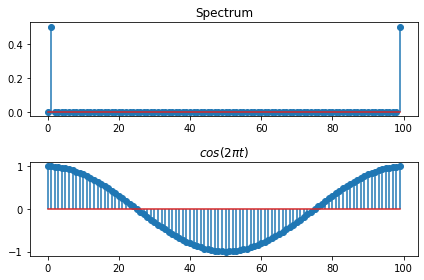

In [20]:
# cos(2*pi*t)

plt.subplot(2,1,1)
N = 100
# t = np.arange(0,N,1)
# f = np.cos(2*np.pi*10*t)
n = np.arange(0,N,1)
x = np.cos(2*np.pi*n/N)
# plt.stem(n,x)
f2 = np.fft.fft(x)/N
# k = np.arange(-N/2,N/2,1)
plt.stem(n,f2,use_line_collection=True)
plt.title('Spectrum')

# ifft
plt.subplot(2,1,2)
f = np.fft.ifft(f2)*N
plt.stem(n,f,use_line_collection=True)
# plt.plot(n,f)
plt.title('$cos(2\pi t)$')
plt.tight_layout()

<StemContainer object of 3 artists>

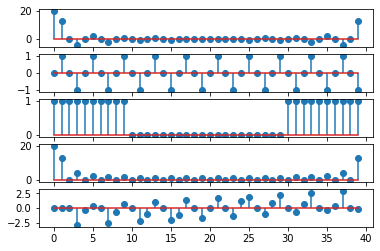

In [160]:
# 周期方波作FFT
plt.subplot(511)
N = 40
x1 = np.ones(int(N/4))
x2 = np.append(x1,np.zeros(int(N/2)))
x3 = np.append(x2,np.ones(int(N/4)))
X = np.fft.fft(x3)
n = np.arange(0,len(x3),1)
plt.stem(n,X,use_line_collection=True) # 默认只画实部

plt.subplot(512)
plt.stem(n,np.imag(X),use_line_collection=True) # 画虚部

plt.subplot(5,1,3)
x = np.fft.ifft(X)
plt.stem(n,x,use_line_collection=True)

# 幅度谱
plt.subplot(514)
plt.stem(n,abs(X),use_line_collection=True)
# 相位谱
plt.subplot(515)
plt.stem(n,np.angle(X),use_line_collection=True)

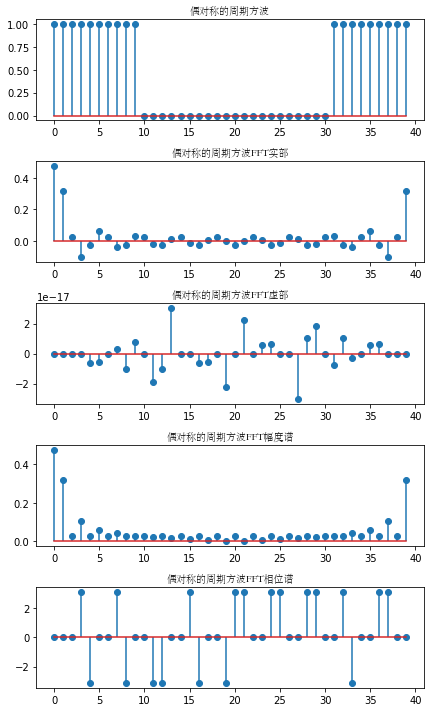

In [38]:
# 周期方波作FFT
plt.figure(figsize=(6,10))
plt.subplot(511)
N = 40
x1 = np.ones(int(N/4))
x2 = np.append(x1,np.zeros(int(N/2)+1))
x3 = np.append(x2,np.ones(int(N/4)-1))
n = np.arange(0,len(x3),1)
plt.stem(n,x3,use_line_collection=True) # 偶对称的周期方波
plt.title("偶对称的周期方波",fontproperties='stsong')

plt.subplot(512)
X = np.fft.fft(x3)/N
plt.stem(n,X,use_line_collection=True) # 默认只画实部
plt.title("偶对称的周期方波FFT实部",fontproperties='stsong')

# 虚部
plt.subplot(513)
plt.stem(n,np.imag(X),use_line_collection=True)
plt.title("偶对称的周期方波FFT虚部",fontproperties='stsong')

# IFFT
# plt.subplot(5,1,3)
x = np.fft.ifft(X)
# plt.stem(n,x,use_line_collection=True)
# plt.title("IFFT",fontproperties='stsong')

# 幅度谱, 和连载347的不同
plt.subplot(514)
plt.stem(n,abs(X),use_line_collection=True)
plt.title("偶对称的周期方波FFT幅度谱",fontproperties='stsong')
# 相位谱
plt.subplot(515)
plt.stem(n,np.angle(X),use_line_collection=True)
plt.title("偶对称的周期方波FFT相位谱",fontproperties='stsong')
plt.tight_layout()

<StemContainer object of 3 artists>

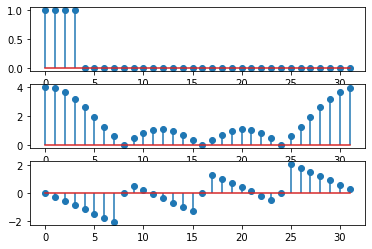

In [167]:
N = 32
x1 = np.ones(4)
x = np.append(x1,np.zeros(N-4))
n = np.arange(0,N,1)
plt.subplot(3,1,1)
plt.stem(n,x,use_line_collection=True)

plt.subplot(3,1,2)
X = np.fft.fft(x) #没有除以N
plt.stem(n,abs(X),use_line_collection=True)

plt.subplot(313)
plt.stem(n,np.angle(X),use_line_collection=True)

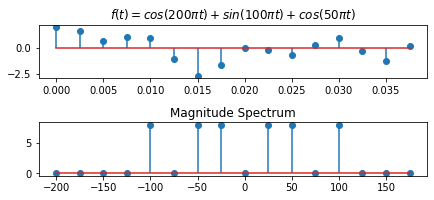

In [53]:
# 连载354
fs = 400 #采样频率
T = 0.04 #截取总时间
N = fs*T #采样16个点
t = np.arange(0,T,1/fs)
x = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
plt.subplot(311)
plt.stem(t,x,use_line_collection=True)
plt.title('$f(t) = cos(200 \pi t)+sin(100 \pi t)+cos(50 \pi t)$')

plt.subplot(312)
X = np.fft.fft(x)
# n = np.arange(0,fs,fs/N) # 16个点，频谱宽度400Hz
n = np.fft.fftfreq(int(N),1/fs)
X = np.fft.fftshift(X)
n = np.fft.fftshift(n)
plt.stem(n,abs(X),use_line_collection=True)
plt.title('Magnitude Spectrum')
plt.tight_layout()

$f(t) = cos(200 \pi t)+sin(100 \pi t)+cos(50 \pi t)$

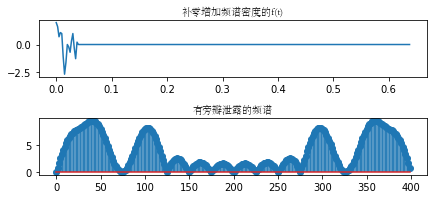

In [54]:
# 采样数据后补0来提高频谱密度，即增大时域信号周期
fs = 400 #采样频率
T = 0.04 #截取总时间
N = fs*T #采样16个点
t = np.arange(0,T,1/fs)
x = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
t2 = np.arange(T,0.64,1/fs)
t = np.append(t,t2)
x = np.append(x,np.zeros(len(t2))) #补0增大频谱密度
plt.subplot(311)
# plt.stem(t,x,use_line_collection=True)
plt.plot(t,x)
plt.title("补零增加频谱密度的f(t)",fontproperties='stsong')

plt.subplot(312)
X = np.fft.fft(x)
n = np.arange(0,400,fs/N/N) # 16个点，频谱宽度400Hz
plt.stem(n,abs(X),use_line_collection=True) # 显然此时频谱分辨率降低
plt.title("有旁瓣泄露的频谱",fontproperties='stsong')
# plt.plot(n,abs(X))
plt.tight_layout()

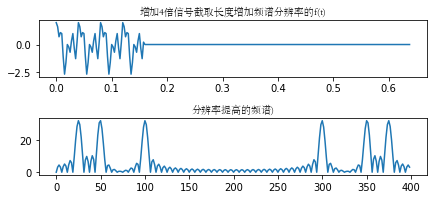

In [55]:
# 增加信号周期数提高频谱分辨率
fs = 400 #采样频率
T = 0.16 #截取总时间，四个周期
N = fs*T #采样64（Not 16）个点
t = np.arange(0,T,1/fs)
x = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
t2 = np.arange(T,0.64,1/fs)
t = np.append(t,t2)
x = np.append(x,np.zeros(len(t2))) #补0增大频谱密度
plt.subplot(311)
# plt.stem(t,x,use_line_collection=True)
plt.plot(t,x)
plt.title("增加4倍信号截取长度增加频谱分辨率的f(t)",fontproperties='stsong')

plt.subplot(312)
X = np.fft.fft(x)
n = np.arange(0,fs,fs/256) # 32个点，频谱宽度400Hz
# plt.stem(n,abs(X),use_line_collection=True) # 显然此时频谱分辨率降低
plt.plot(n,abs(X)[:256]) # 此时存在的非信号频谱分量就是泄露效应
plt.title("分辨率提高的频谱)",fontproperties='stsong')
plt.tight_layout()

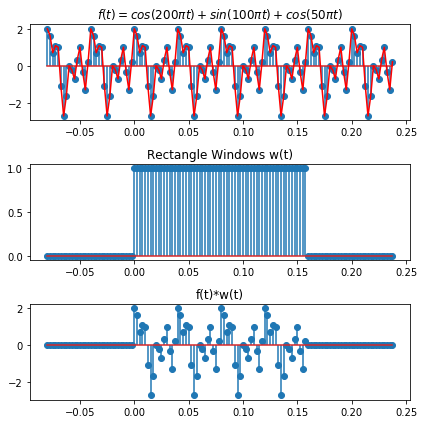

In [74]:
plt.figure(figsize=(6,6))
# 原信号f(t)
plt.subplot(3,1,1)
fs = 400 #采样频率
T = 0.04*8 #周期数目
N = fs*T #采样点数
t = np.arange(-T/4,3*T/4,1/fs)
f = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
plt.stem(t,f,use_line_collection=True)
plt.plot(t,f,color='r')
plt.title('$f(t) = cos(200 \pi t)+sin(100 \pi t)+cos(50 \pi t)$')

# 矩形窗w(t)
plt.subplot(312)
w1 = np.zeros(int(N/4))
w2 = np.ones(int(N/2))
w = np.append(w1,w2)
w = np.append(w,w1)
plt.stem(t,w,use_line_collection=True)
plt.title('Rectangle Windows w(t)')

# 乘积信号
plt.subplot(313)
y = f*w
plt.stem(t,y,use_line_collection=True)
plt.title('f(t)*w(t)')
plt.tight_layout()

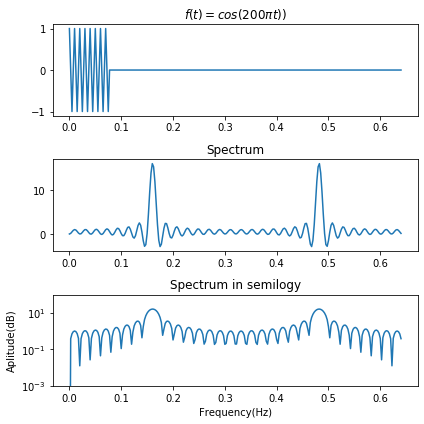

In [99]:
plt.figure(figsize=(6,6))
# 原信号f(t)
plt.subplot(3,1,1)
fs = 400 #采样频率
T = 0.04*2 #周期数目
N = fs*T #采样点数
t = np.arange(0,T,1/fs)
f = np.cos(200*np.pi*t)
t2 = np.arange(T,0.64,1/fs)
t = np.append(t,t2)
f = np.append(f,np.zeros(len(t2))) #补0增大频谱密度
plt.plot(t,f)
plt.title('$f(t) = cos(200 \pi t))$')

plt.subplot(312)
F = np.fft.fft(f)
plt.plot(t,F)
plt.title('Spectrum')

plt.subplot(313)
plt.semilogy(t,abs(F))
# Z = 20*np.log10(abs(F))
# plt.plot(t,Z)
plt.ylim([0.001,100])
plt.title('Spectrum in semilogy')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Aplitude(dB)')
plt.tight_layout()

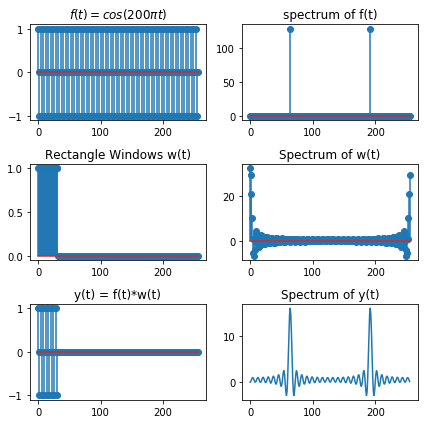

In [110]:
plt.figure(figsize=(6,6))
# 原信号f(t)
plt.subplot(3,2,1)
fs = 400 #采样频率
T = 0.04*16 #周期数目
N = fs*T #采样点数
t = np.arange(0,T,1/fs)
f = np.cos(200*np.pi*t)
t = np.arange(0,N,1)
plt.stem(t,f,use_line_collection=True)
# plt.plot(t,f,color='r')
plt.title('$f(t) = cos(200 \pi t)$')

# 矩形窗w(t)
plt.subplot(323)
w1 = np.ones(int(N/8))
w2 = np.zeros(int(N-N/8))
w = np.append(w1,w2)
plt.stem(t,w,use_line_collection=True)
plt.title('Rectangle Windows w(t)')

# 乘积信号
plt.subplot(325)
y = f*w
plt.stem(t,y,use_line_collection=True)
plt.title('y(t) = f(t)*w(t)')

# Spetrum
plt.subplot(322)
F = np.fft.fft(f)
plt.stem(t,F,use_line_collection=True)
plt.title('spectrum of f(t)')
plt.subplot(324)
W = np.fft.fft(w)
plt.stem(t,W,use_line_collection=True)
plt.title('Spectrum of w(t)')
plt.subplot(326)
Y = np.fft.fft(y)
# plt.stem(t,Y,use_line_collection=True)
plt.plot(t,Y)
plt.title('Spectrum of y(t)')
plt.tight_layout()

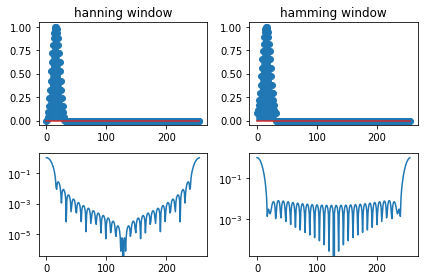

In [124]:
# hanning window
plt.subplot(221)
N = 256
y1 = np.hanning(32)
y2 = np.zeros(int(N-32))
y = np.append(y1,y2)
n = np.arange(0,N,1)
plt.stem(n,y,use_line_collection=True)
plt.title('hanning window')
# Spectrum
plt.subplot(223)
Y = np.fft.fft(y)
# plt.stem(n,abs(Y)/abs(len(Y)),use_line_collection=True)
# plt.plot(n,abs(Y)/max(abs(Y)))
plt.semilogy(n,abs(Y)/max(abs(Y)))
plt.tight_layout()

plt.subplot(222)
# y1 = np.hanning(32)
y1 = np.hamming(32)
y2 = np.zeros(int(N-32))
y = np.append(y1,y2)
n = np.arange(0,N,1)
plt.stem(n,y,use_line_collection=True)
plt.title('hamming window')
# Spectrum
plt.subplot(224)
Y = np.fft.fft(y)
# plt.stem(n,abs(Y)/abs(len(Y)),use_line_collection=True)
# plt.plot(n,abs(Y)/max(abs(Y)))
plt.semilogy(n,abs(Y)/max(abs(Y)))
plt.tight_layout()

$w_hnn(n）=0.5-0.5cos(\frac{2\pi n}{N-1}), n=0, 1, 2, \cdots, N-1$
汉宁窗主瓣宽度增大，旁瓣高度减小；即牺牲分辨率，换来旁瓣泄露的减小

<StemContainer object of 3 artists>

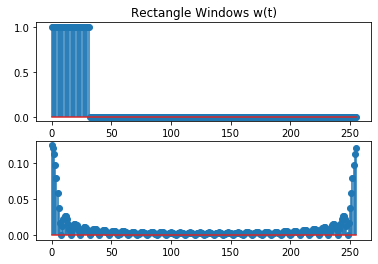

In [116]:
N = 256
plt.subplot(211)
w1 = np.ones(int(N/8))
w2 = np.zeros(int(N-N/8))
w = np.append(w1,w2)
t = np.arange(0,N,1)
plt.stem(t,w,use_line_collection=True)
plt.title('Rectangle Windows w(t)')
plt.subplot(212)
W = np.fft.fft(w)
plt.stem(t,abs(W)/abs(len(W)),use_line_collection=True)


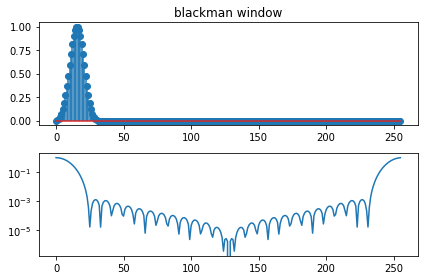

In [125]:
plt.subplot(211)
N = 256
y1 = np.blackman(32)
y2 = np.zeros(int(N-32))
y = np.append(y1,y2)
n = np.arange(0,N,1)
plt.stem(n,y,use_line_collection=True)
plt.title('blackman window')
# Spectrum
plt.subplot(212)
Y = np.fft.fft(y)
# plt.stem(n,abs(Y)/abs(len(Y)),use_line_collection=True)
# plt.plot(n,abs(Y)/max(abs(Y)))
plt.semilogy(n,abs(Y)/max(abs(Y)))
plt.tight_layout()

Text(0.5, 1.0, '窗函数比较')

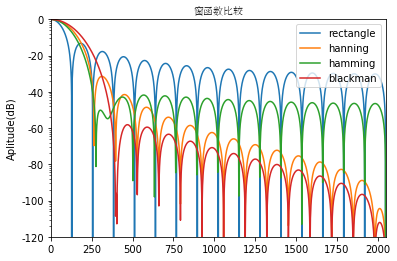

In [151]:
# 窗函数对比
N = 4096
n = 32
y1a = np.ones(n)
y1b = np.hanning(n)
y1c = np.hamming(n)
y1d = np.blackman(n)
y2 = np.zeros(N-n)
n = np.arange(0,N,1)
# d = {'a':'rectangle', 'b':'hanning', 'c':'hamming', 'd':'blackman'}
d = ['rectangle', 'hanning', 'hamming', 'blackman']
count = 0

for y in [y1a,y1b,y1c,y1d]:
    yx = np.append(y,y2)
    Yx = np.fft.fft(yx)
    plt.semilogy(n,abs(Yx)/max(abs(Yx)),label=d[count])
    count+=1
    
plt.ylim(0.000001,1)
plt.xlim(0,N/2)
plt.legend(loc='upper right')
plt.yticks([1,0.1,0.01,0.001,0.0001,0.00001,0.000001],['0','-20','-40','-60','-80','-100','-120'])
plt.ylabel('Aplitude(dB)')
plt.title('窗函数比较',fontproperties='stsong')

SyntaxError: invalid syntax (<ipython-input-140-49eaf6e2fffa>, line 4)

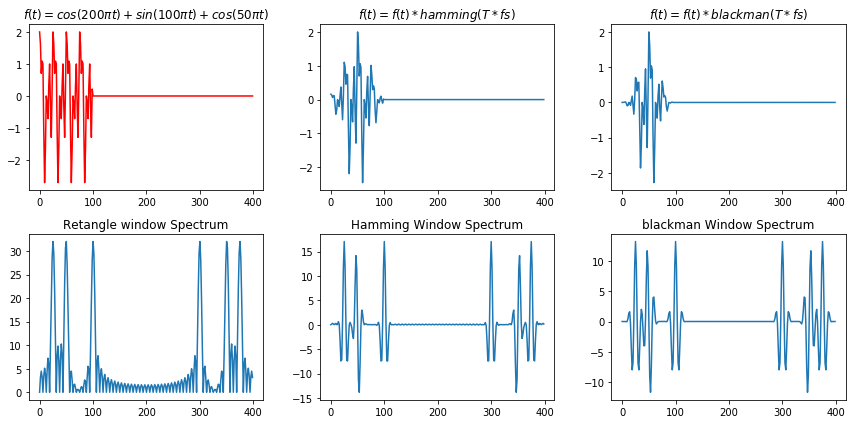

In [177]:
plt.figure(figsize=(12,6))
# 原信号f(t)
plt.subplot(231)
fs = 400 #采样频率
T = 0.04*4 #周期数目
N = 256 #采样点数
t = np.arange(0,T,1/fs)
f = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
N0 = int(N - T*fs)
ft = np.append(f,np.zeros(N0))
t = np.arange(0,fs,fs/N)
plt.plot(t,ft,color='r')
plt.title('$f(t) = cos(200 \pi t)+sin(100 \pi t)+cos(50 \pi t)$')
# add rectangle window
plt.subplot(234)
X = np.fft.fft(ft)
plt.plot(t,abs(X),label='rectangle')
plt.title('Retangle window Spectrum')

# add hamming window
plt.subplot(232)
x1c = np.hamming(T*fs)
ft = f*x1c
ft = np.append(ft,np.zeros(N0))
plt.plot(t,ft)
plt.title('$f(t)=f(t)*hamming(T*fs)$')
plt.subplot(235)
Xc = np.fft.fft(ft)
plt.plot(t,Xc)
plt.title('Hamming Window Spectrum')

# add blackman window
plt.subplot(233)
x1d = np.blackman(T*fs)
ft = f*x1d
ft = np.append(ft,np.zeros(N0))
plt.plot(t,ft)
plt.title('$f(t)=f(t)*blackman(T*fs)$')
plt.subplot(236)
Xd = np.fft.fft(ft)
plt.plot(t,Xd)
plt.title('blackman Window Spectrum')
plt.tight_layout()

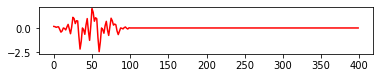

In [167]:
plt.subplot(4,1,1)
fs = 400 #采样频率
T = 0.04*4 #周期数目
N = 256 #采样点数
t = np.arange(0,T,1/fs)
f = np.cos(200*np.pi*t)+np.sin(100*np.pi*t)+np.cos(50*np.pi*t)
x1c = np.hamming(T*fs)
f = f*x1c
N0 = int(N - T*fs)
f = np.append(f,np.zeros(N0))
t = np.arange(0,fs,fs/N)
plt.plot(t,f,color='r')

Text(0.5, 1.0, 'Hamming Window Spectrum')

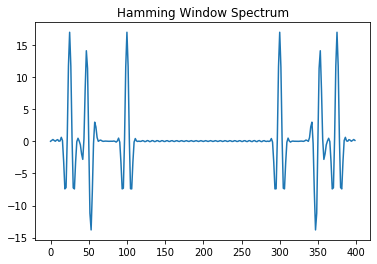

In [171]:
Xc = np.fft.fft(ft)
plt.plot(t,Xc)
plt.title('Hamming Window Spectrum')